In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np
import math

In [61]:
class Funsolvea(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        #Se define la métrica que nos funciona para monitorear la evolución del entrenamiento. 
        self.loss_tracker = keras.metrics.Mean(name="loss") #loss_tracker pude ser cambiada por mivalor_de_costo o como queramos
        
    @property #Este es u "decorador" que funciona para definir el método de acceso para los atributos de la clase 
    def metrics(self):
        return [self.loss_tracker] #igual cambia el loss_tracker
    
    
    def train_step(self, data):
        batch_size = 200 #Calibra la resolucion de la ec.dif
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)
        
        with tf.GradientTape() as tape: #Realiza los gradientes automáticos
            y_pred = self(x, training=True)
            eq = y_pred - 3.*tf.sin(math.pi*x) #Ecuación a Reproducir
            
            loss = keras.losses.mean_squared_error(0.,eq) #Calcula el error cuadrático medio entre el 0 y la eq.
            
        #aplica los gradientes a la pérdida según las variables de entrenamiento       
        grads = tape.gradient(loss, self.trainable_variables)

        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

        
        #actualiza metricas
        self.loss_tracker.update_state(loss)

        return {"loss": self.loss_tracker.result()}
    

In [62]:
#Aquí se describe el modelo
model = Funsolvea()
    
model.add(Dense(100,activation ='tanh', input_shape=(1,)))
model.add(Dense(30, activation ='tanh'))
model.add(Dense(100, activation ='tanh'))
model.add(Dense(30, activation ='sigmoid'))
model.add(Dense(1, activation ='linear'))
    
model.summary()


Model: "funsolvea_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 100)               200       
                                                                 
 dense_50 (Dense)            (None, 30)                3030      
                                                                 
 dense_51 (Dense)            (None, 100)               3100      
                                                                 
 dense_52 (Dense)            (None, 30)                3030      
                                                                 
 dense_53 (Dense)            (None, 1)                 31        
                                                                 
Total params: 9391 (36.68 KB)
Trainable params: 9391 (36.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
epochs = 1000 #cuantas veces entrenar. En cada epoch hace una mejora en los parametros

model.compile(optimizer=Adam(), metrics=['loss'])
#Se define el vector con 100 elementos entre -1 y 1 como se pide en la tarea
x = tf.linspace(-1,1,100)
history = model.fit(x,epochs=epochs, verbose=0) 

x_testv = tf.linspace(-1,1,100)
a = model.predict(x_testv)
model.save("eq1.keras")

4/4 [==============================] - 0s 1ms/step


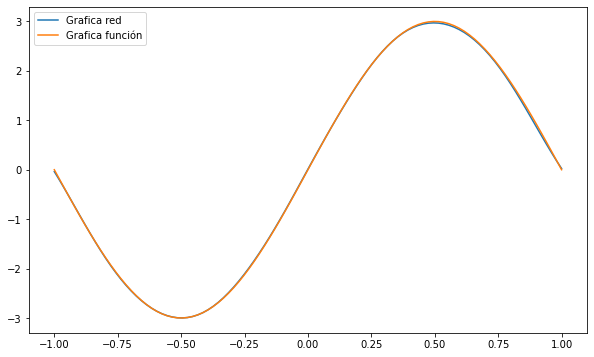

In [66]:
#Aquí se comparan las gráficas de la predicción y del test
plt.figure(figsize=(10,6))
plt.plot(x_testv,a)
plt.plot(x_testv, 3*np.sin(np.pi*x))
legend = ['Grafica red','Grafica función']
plt.legend(loc='upper left', labels= legend)
plt.show()

In [84]:
class Funsolve2(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss") #loss_tracker pude ser cambiada por mivalor_de_costo o como queramos  
    @property
    def metrics(self):
        return [self.loss_tracker] #igual cambia el loss_tracker
    def train_step(self, data):
        batch_size =100 #Calibra la resolucion de la ec.dif
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)
        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            eq = y_pred - 1 - 2*x - 4*x**3
            loss = keras.losses.mean_squared_error(0.,eq)        
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))        
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

In [85]:
model_2 = Funsolve2()    
model_2.add(Dense(10,activation ='tanh', input_shape=(1,)))
model_2.add(Dense(10, activation ='tanh'))
model_2.add(Dense(10, activation ='tanh'))
model_2.add(Dense(10, activation ='sigmoid'))
model_2.add(Dense(1, activation ='linear')) 
model_2.summary()  

Model: "funsolve2_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 10)                20        
                                                                 
 dense_79 (Dense)            (None, 10)                110       
                                                                 
 dense_80 (Dense)            (None, 10)                110       
                                                                 
 dense_81 (Dense)            (None, 10)                110       
                                                                 
 dense_82 (Dense)            (None, 1)                 11        
                                                                 
Total params: 361 (1.41 KB)
Trainable params: 361 (1.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
model_2.compile(optimizer=Adam(), metrics=['loss'])
x = tf.linspace(-1,1,100)
history = model_2.fit(x,epochs=1800,verbose=0)
x_test = tf.linspace(-1,1,100)
a = model_2.predict(x_test)
model.save("eq2.keras")

4/4 [==============================] - 0s 1ms/step


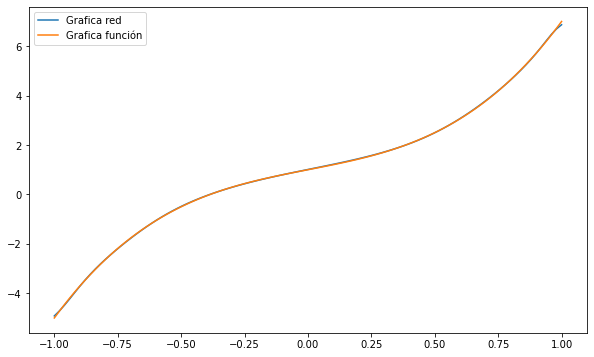

In [87]:
plt.figure(figsize=(10,6))
plt.plot(x_test,a)
plt.plot(x_test, 1+2*x+4*(x**3))
legend = ['Grafica red','Grafica función']
plt.legend(loc='upper left', labels= legend)
plt.show()